In [19]:
# graph imformation
%matplotlib notebook
import matplotlib.pyplot as plt #matlab plots
import seaborn as sns 
sns.set_style('whitegrid') # style preference on graphs

import pandas as pd 
import numpy as np

import pickle

In [6]:
loaded_names = pickle.load(open('../verySimpleApp/scripts/reviewer_names.sav','rb'))
print(loaded_names)

['Kerin O’Keefe', 'Roger Voss', 'Paul Gregutt', 'Alexander Peartree', 'Michael Schachner', 'Anna Lee C. Iijima', 'Virginie Boone', 'Matt Kettmann', 'Sean P. Sullivan', 'Jim Gordon', 'Joe Czerwinski', 'Anne Krebiehl\xa0MW', 'Lauren Buzzeo', 'Mike DeSimone', 'Jeff Jenssen', 'Susan Kostrzewa', 'Carrie Dykes', 'Fiona Adams', 'Christina Pickard']


In [5]:
loaded_names_short = loaded_names[:10]
print(loaded_names_short)

['Kerin O’Keefe', 'Roger Voss', 'Paul Gregutt', 'Alexander Peartree', 'Michael Schachner', 'Anna Lee C. Iijima', 'Virginie Boone', 'Matt Kettmann', 'Sean P. Sullivan', 'Jim Gordon']


In [13]:

for name in loaded_names_short: 
    filename= "../verySimpleApp/scripts/fits/predicted_test_%s.sav"%name
    a_dic = pickle.load(open(filename), 'rb')
    
print(accuracy_dic)

EOFError: Ran out of input

In [14]:
Kerin_OKeefe = pickle.load(open("../verySimpleApp/scripts/fits/predicted_test_%s.sav"%name ,'rb'))

In [37]:
print(Kerin_OKeefe[0])
KOK_ml = Kerin_OKeefe[0]
KOK_true = Kerin_OKeefe[1]
KOK_accuracy = Kerin_OKeefe[2]
error = np.round(np.array(KOK_ml)) - KOK_true
print(len(KOK_ml))
print(len(KOK_true))

[88.22369852 90.35837135 90.03799978 ... 88.22369852 90.03799978
 87.25141792]
1076
1076


98.11977256158833


<IPython.core.display.Javascript object>


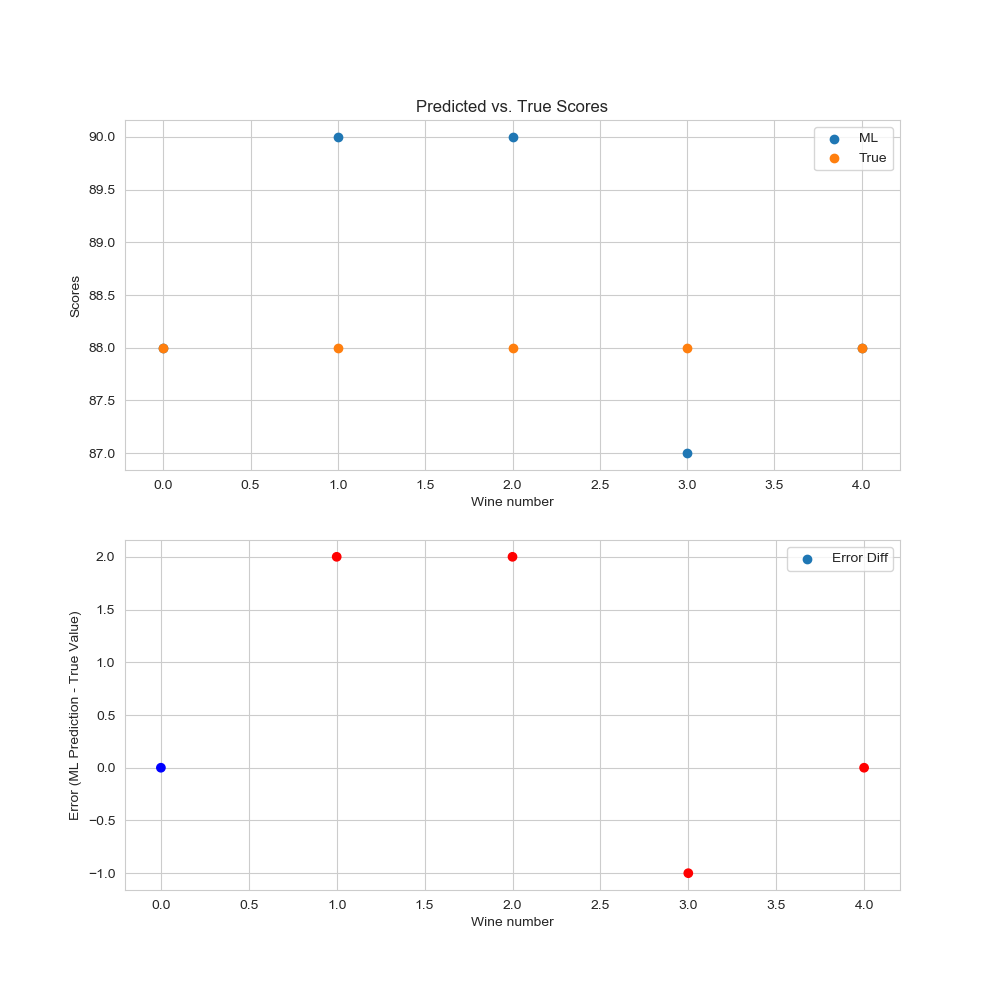

In [48]:
KOK_y = np.array(range(len(KOK_ml)))
N = 5 #len(KOK_ml)
print(accuracy)
fig = plt.figure(figsize=(10,10))
ax= fig.add_subplot(211)
plt.scatter(KOK_y[:N],np.round(np.array(KOK_ml[:N])), label='ML')
plt.scatter(KOK_y[:N], KOK_true[:N], label='True')
plt.xlabel('Wine number')
plt.ylabel('Scores')
plt.title('Predicted vs. True Scores')
plt.legend()
ax= fig.add_subplot(212)
plt.scatter(KOK_y[:N], error[:N], label='Error Diff', c=np.sign(KOK_y[:N]),cmap="bwr")
plt.xlabel('Wine number')
plt.ylabel('Error (ML Prediction - True Value)')
plt.legend()